In [27]:
from tqdm import tqdm_notebook
import pandas as pd
import os
import pickle
import numpy as np
from nltk.tokenize import TweetTokenizer
from collections import defaultdict, Counter

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(color_codes=True)

from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
#!pip install vaderSentiment

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
# load clean tweets
df_cleanscreen = pd.DataFrame()
for i in tqdm_notebook(range(17)):
    
    with open('tweet_screen{}.pkl'.format(i), 'rb') as filehandle:  
    # read the data as binary data stream
        df_slice = pickle.load(filehandle)
        
    df_cleanscreen = pd.concat([df_cleanscreen, df_slice], ignore_index=True)

df_cleanscreen.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373447 entries, 0 to 1373446
Data columns (total 11 columns):
id           1373447 non-null object
date         1373447 non-null datetime64[ns]
text         1373447 non-null object
author       1373447 non-null object
favorite     1373447 non-null int64
url          1373447 non-null object
lang         1373447 non-null object
length       1373447 non-null int64
cleantext    1373447 non-null object
tokens       1373447 non-null object
count        1373447 non-null int64
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 115.3+ MB


In [5]:
df_cleanscreen.sample(10)

,id,date,text,author,favorite,url,lang,length,cleantext,tokens,count
204553,1022605221120368640,2018-07-26 15:10:58,The markets!,CryptoCred,3,https://twitter.com/CryptoCred/status/10226052...,en,12,The markets!,"[The, markets, !]",3
1049584,454429521664421888,2014-04-10 18:23:35,"@ naval @ Wehtam haha, figured but thought it ...",muneeb,0,https://twitter.com/muneeb/status/454429521664...,en,51,"haha, figured but thought it still needs to be...","[haha, ,, figured, but, thought, it, still, ne...",11
904265,615215313211162628,2015-06-28 10:48:55,Best articulation of freedom I've heard: “I'll...,jack,106,https://twitter.com/jack/status/61521531321116...,en,117,Best articulation of freedom I've heard: “I'll...,"[Best, articulation, of, freedom, I've, heard,...",28
465877,955001667434500096,2018-01-21 00:58:35,What if it's centrally issued by a smart contr...,VladZamfir,3,https://twitter.com/VladZamfir/status/95500166...,en,50,What if it's centrally issued by a smart contr...,"[What, if, it's, centrally, issued, by, a, sma...",10
1179933,684580754374840321,2016-01-05 19:42:25,"@ hansent Those are important, maybe the most ...",paulg,1,https://twitter.com/paulg/status/6845807543748...,en,107,"Those are important, maybe the most important,...","[Those, are, important, ,, maybe, the, most, i...",24
33723,789003798140248064,2016-10-20 00:22:19,pic.twitter.com/szv7OfKvzV,AlyseKilleen,0,https://twitter.com/AlyseKilleen/status/789003...,en,26,pic.twitter.com/szv7OfKvzV,[pic.twitter.com/szv7OfKvzV],1
503914,797578451586838529,2016-11-12 15:14:55,"It's very difficult in practice, especially af...",aantonop,0,https://twitter.com/aantonop/status/7975784515...,en,97,"It's very difficult in practice, especially af...","[It's, very, difficult, in, practice, ,, espec...",20
753741,1128709977936416769,2019-05-15 10:13:23,54/ TPS Assuming that current Layer 1 is 20 TP...,danheld,5,https://twitter.com/danheld/status/11287099779...,en,158,54/ TPS Assuming that current Layer 1 is 20 TP...,"[54, /, TPS, Assuming, that, current, Layer, 1...",37
4302,913386429811699712,2017-09-28 05:54:29,Ha! Definitely not advice....merely an observa...,APompliano,2,https://twitter.com/APompliano/status/91338642...,en,53,Ha! Definitely not advice....merely an observa...,"[Ha, !, Definitely, not, advice, ..., merely, ...",10
147731,1071261318961758208,2018-12-07 20:32:56,“Most optimistic experts estimate it will take...,ChristopherA,47,https://twitter.com/ChristopherA/status/107126...,en,255,“Most optimistic experts estimate it will take...,"[“, Most, optimistic, experts, estimate, it, w...",58


In [6]:
sentence = 'I get my hair cut in Ampthill'
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(sentence)
print("{:-<65} {}".format(sentence, str(vs)))

I get my hair cut in Ampthill------------------------------------ {'neg': 0.296, 'pos': 0.0, 'neu': 0.704, 'compound': -0.2732}


In [7]:
vs['compound']

-0.2732

In [8]:
# transform tweets to sentiment
pos_list = []
neu_list = []
neg_list = []
cmp_list = []
analyzer = SentimentIntensityAnalyzer()

for _,nrows in tqdm_notebook(df_cleanscreen.iterrows()):
    vs = analyzer.polarity_scores(nrows['cleantext'])
    pos_list.append(vs['pos'])
    neu_list.append(vs['neu'])
    neg_list.append(vs['neg'])
    cmp_list.append(vs['compound'])
    
df_cleanscreen['vad_positive'] = pos_list
df_cleanscreen['vad_neutral'] = neu_list
df_cleanscreen['vad_negative'] = neg_list
df_cleanscreen['vad_compound'] = cmp_list   

In [9]:
df_cleanscreen.sample(10)

,id,date,text,author,favorite,url,lang,length,cleantext,tokens,count,vad_positive,vad_neutral,vad_negative,vad_compound
76262,517402131297742848,2014-10-01 12:54:15,"Day ain't over yet, tune at 5pm for @ CNBCFast...",BKBrianKelly,3,https://twitter.com/BKBrianKelly/status/517402...,en,108,"Day ain't over yet, tune at 5pm for we have ex...","[Day, ain't, over, yet, ,, tune, at, 5pm, for,...",18,0.086,0.914,0.000,0.1280
951076,299177503107448832,2013-02-06 07:27:29,Bring Your Own Device Trend Sparks New Securit...,jonmatonis,0,https://twitter.com/jonmatonis/status/29917750...,en,64,Bring Your Own Device Trend Sparks New Securit...,"[Bring, Your, Own, Device, Trend, Sparks, New,...",11,0.211,0.789,0.000,0.3400
1032809,471711514727297024,2014-05-28 10:56:03,Facebook's Ben Davenport leaves for bitcoin st...,michaelterpin,7,https://twitter.com/michaelterpin/status/47171...,en,72,Facebook's Ben Davenport leaves for bitcoin st...,"[Facebook's, Ben, Davenport, leaves, for, bitc...",10,0.000,1.000,0.000,0.0000
1083153,1029271488656863232,2018-08-14 00:40:20,"Learning, because I enjoy it.",naval,227,https://twitter.com/naval/status/1029271488656...,en,29,"Learning, because I enjoy it.","[Learning, ,, because, I, enjoy, it, .]",7,0.516,0.484,0.000,0.4939
1276535,8875411076,2010-02-09 15:09:34,do i cancel class tomorrow? @ yalelawtech,starkness,0,https://twitter.com/starkness/status/8875411076,en,27,do i cancel class tomorrow?,"[do, i, cancel, class, tomorrow, ?]",6,0.000,0.600,0.400,-0.2500
56301,1032760853693493248,2018-08-23 15:45:49,Ripple has no way of getting USD into your che...,AriDavidPaul,1,https://twitter.com/AriDavidPaul/status/103276...,en,169,Ripple has no way of getting USD into your che...,"[Ripple, has, no, way, of, getting, USD, into,...",37,0.000,0.841,0.159,-0.6486
365098,1122829846193811456,2019-04-29 04:47:51,I’m not a BTC maximalist. If you listen to my ...,PeterMcCormack,1,https://twitter.com/PeterMcCormack/status/1122...,en,128,I’m not a BTC maximalist. If you listen to my ...,"[I, ’, m, not, a, BTC, maximalist, ., If, you,...",34,0.120,0.880,0.000,0.4588
942696,23208848802,2010-09-06 21:43:36,"RT @ malburns ""Linden Lab loses $100 million s...",jonmatonis,0,https://twitter.com/jonmatonis/status/23208848802,en,45,"RT ""Linden Lab loses $100 million since July""","[RT, "", Linden, Lab, loses, $, 100, million, s...",11,0.000,0.753,0.247,-0.3182
1133790,857636800013230080,2017-04-27 09:45:21,John McAfee: the why and how of the Privacy Ph...,officialmcafee,75,https://twitter.com/officialmcafee/status/8576...,en,52,John McAfee: the why and how of the Privacy Ph...,"[John, McAfee, :, the, why, and, how, of, the,...",13,0.000,1.000,0.000,0.0000
719047,963772500164468736,2018-02-14 05:50:44,Haha everyone's opinion matters to me,crypto_bobby,5,https://twitter.com/crypto_bobby/status/963772...,en,37,Haha everyone's opinion matters to me,"[Haha, everyone's, opinion, matters, to, me]",6,0.506,0.494,0.000,0.4767


In [10]:
def kurtosis_skewness(data):
    print( '      kurtosis=',"%.1f" % kurtosis(data), '   skewness=',"%.1f" % skew(data), '     sum=',np.sum(data))
    print()

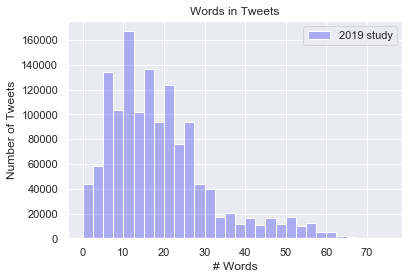

mined dataset
      kurtosis= 1.6    skewness= 1.2      sum= 25530975



In [11]:
# initialize list
data3 = df_cleanscreen['count'].tolist()

# set up a beautiful plot        
plt.hist(data3,30,(0,75), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Words in Tweets')
plt.xlabel('# Words')
plt.ylabel('Number of Tweets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

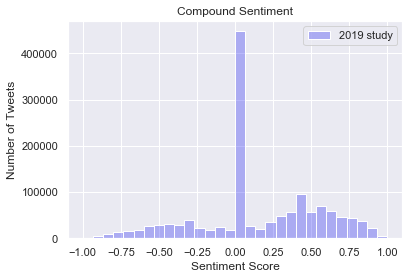

mined dataset
      kurtosis= -0.4    skewness= -0.2      sum= 196302.51609999995



In [12]:
# initialize list
data3 = df_cleanscreen['vad_compound'].tolist()

# set up a beautiful plot        
plt.hist(data3,30,(-1,1), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Compound Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

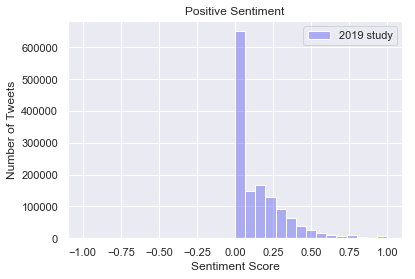

mined dataset
      kurtosis= 3.2    skewness= 1.6      sum= 193510.82799999986



In [13]:
# initialize list
data3 = df_cleanscreen['vad_positive'].tolist()

# set up a beautiful plot        
plt.hist(data3,30,(-1,1), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Positive Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

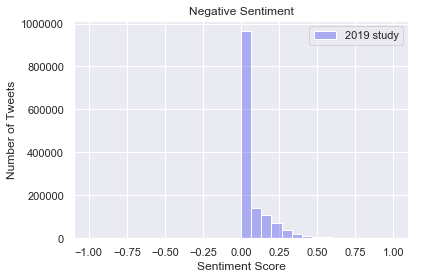

mined dataset
      kurtosis= 7.5    skewness= 2.4      sum= 84715.91499999996



In [14]:
# initialize list
data3 = df_cleanscreen['vad_negative'].tolist()

# set up a beautiful plot        
plt.hist(data3,30,(-1,1), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Negative Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

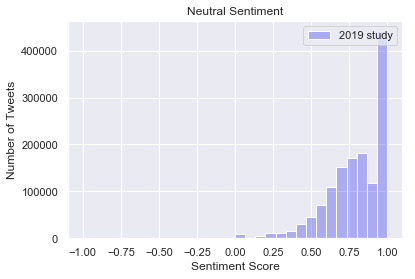

mined dataset
      kurtosis= 1.4    skewness= -1.1      sum= 1092485.895



In [15]:
# initialize list
data3 = df_cleanscreen['vad_neutral'].tolist()

# set up a beautiful plot        
plt.hist(data3,30,(-1,1), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Neutral Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

C:\Users\Gamer\Python\Anaconda3\envs\hmm-tagger\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


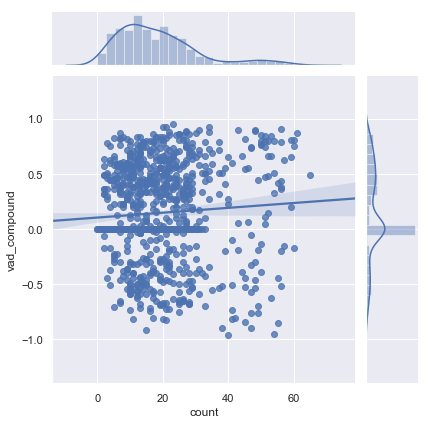

In [20]:
dfSample = df_cs.sample(1000)
x = dfSample['count']
y= dfSample['vad_compound']
g = sns.jointplot(x, y, kind="reg")
plt.show()                                             

In [23]:
# read in the selected poets
with open('screened_seeds_06119.pkl', 'rb') as filehandle:  
    # read the data as binary data stream
        poets = pickle.load(filehandle)

In [29]:
# append poet table with sentiments
max_sent = []
min_sent = []
avg_sent = []
med_sent = []

for poet in tqdm_notebook(poets):
    
    df_slice = df_cleanscreen[df_cleanscreen['author'] == poet] 
    max_sent.append(max(df_slice['vad_compound']))
    min_sent.append(min(df_slice['vad_compound']))
    avg_sent.append(np.mean(df_slice['vad_compound']))
    med_sent.append(np.median(df_slice['vad_compound']))
    
df_poets = pd.DataFrame()
df_poets['max_sent'] = max_sent
df_poets['min_sent'] = min_sent
df_poets['avg_sent'] = avg_sent
df_poets['med_sent'] = med_sent

In [30]:
# Show Statistics of poets
df_poets.describe()

,max_sent,min_sent,avg_sent,med_sent
count,143.000000,143.000000,143.000000,143.000000
mean,0.971189,-0.948107,0.158802,0.079559
std,0.010297,0.041992,0.082776,0.135640
min,0.940300,-0.996200,-0.047208,0.000000
25%,0.964750,-0.973600,0.098963,0.000000
50%,0.972300,-0.961700,0.141359,0.000000
75%,0.978700,-0.941900,0.204052,0.110525
max,0.991800,-0.740500,0.454344,0.555000


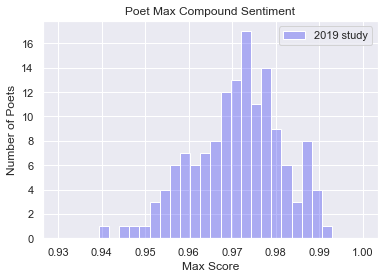

mined dataset
      kurtosis= -0.2    skewness= -0.4      sum= 138.88



In [33]:
# initialize list
data3 = df_poets['max_sent'].tolist()

# set up a beautiful plot        
plt.hist(data3,30,(0.93,1.0), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Poet Max Compound Sentiment')
plt.xlabel('Max Score')
plt.ylabel('Number of Poets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

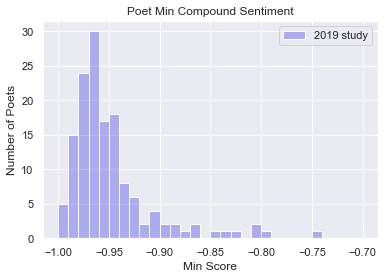

mined dataset
      kurtosis= 6.0    skewness= 2.3      sum= -135.57930000000002



In [38]:
# initialize list
data3 = df_poets['min_sent'].tolist()

# set up a beautiful plot        
plt.hist(data3,30,(-1.0,-0.7), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Poet Min Compound Sentiment')
plt.xlabel('Min Score')
plt.ylabel('Number of Poets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

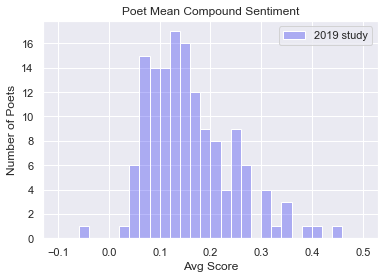

mined dataset
      kurtosis= 1.0    skewness= 0.9      sum= 22.708696885864



In [37]:
# initialize list
data3 = df_poets['avg_sent'].tolist()

# set up a beautiful plot        
plt.hist(data3,30,(-0.1,0.5), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Poet Mean Compound Sentiment')
plt.xlabel('Avg Score')
plt.ylabel('Number of Poets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

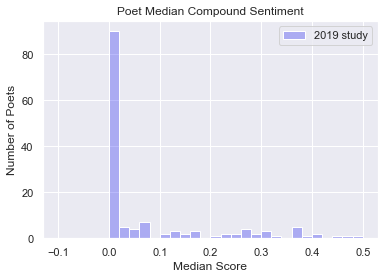

mined dataset
      kurtosis= 1.6    skewness= 1.6      sum= 11.37695



In [39]:
# initialize list
data3 = df_poets['med_sent'].tolist()

# set up a beautiful plot        
plt.hist(data3,30,(-0.1,0.5), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Poet Median Compound Sentiment')
plt.xlabel('Median Score')
plt.ylabel('Number of Poets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

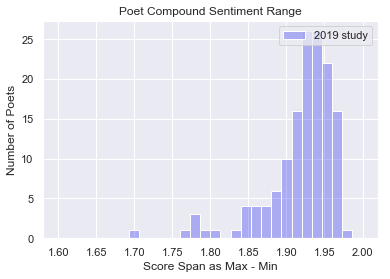

mined dataset
      kurtosis= 4.8    skewness= -2.0      sum= 274.4593



In [42]:
# initialize list
data3 = (df_poets['max_sent'] - df_poets['min_sent']).tolist()

# set up a beautiful plot        
plt.hist(data3,30,(1.6,2), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Poet Compound Sentiment Range')
plt.xlabel('Score Span as Max - Min')
plt.ylabel('Number of Poets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

In [44]:
len(df_cleanscreen[df_cleanscreen['vad_compound']==0])

432638

In [46]:
len(df_cleanscreen[df_cleanscreen['vad_neutral']==1])

426292

In [45]:
# save for study
df_poets.to_csv('poet_sentiments_061219.csv', index=False)

In [47]:
# screen the zeros out
df_in = df_cleanscreen[(df_cleanscreen['vad_compound']!=0) & (df_cleanscreen['vad_neutral']!=1)].copy()
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940809 entries, 0 to 1373446
Data columns (total 15 columns):
id              940809 non-null object
date            940809 non-null datetime64[ns]
text            940809 non-null object
author          940809 non-null object
favorite        940809 non-null int64
url             940809 non-null object
lang            940809 non-null object
length          940809 non-null int64
cleantext       940809 non-null object
tokens          940809 non-null object
count           940809 non-null int64
vad_positive    940809 non-null float64
vad_neutral     940809 non-null float64
vad_negative    940809 non-null float64
vad_compound    940809 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 114.8+ MB


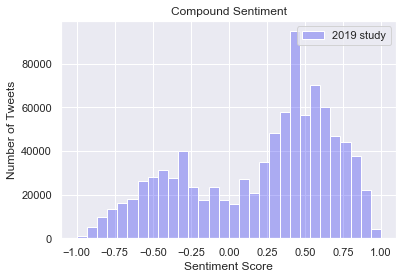

mined dataset
      kurtosis= -0.8    skewness= -0.6      sum= 196302.5161



In [48]:
# initialize list
data3 = df_in['vad_compound'].tolist()

# set up a beautiful plot        
plt.hist(data3,30,(-1,1), color = (.1,.1,.95,.3), label = '2019 study')
plt.legend(loc='upper right')
plt.title('Compound Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.show()
        
# after histogram, print out the distribution descriptors
print('mined dataset')
kurtosis_skewness(data3)

In [50]:
# split giant dataframe into 35 pieces having 80791 rows each
df_io = df_in.copy()
df_split = np.array_split(df_io, 35, axis=0)

# clean the dataframes, filter out the non-English entries
for i in tqdm_notebook(range(35)):
    
    # output to pickle
    with open('tweet_sent{}.pkl'.format(i), 'wb') as filehandle:  
        # store the data
        pickle.dump(df_split[i], filehandle)